filterMask: (3, 3)
borderSize: 1
filterSum: 20
inputImage: (512, 512)
borderedImage: (514, 514)


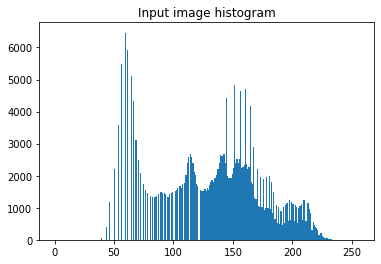

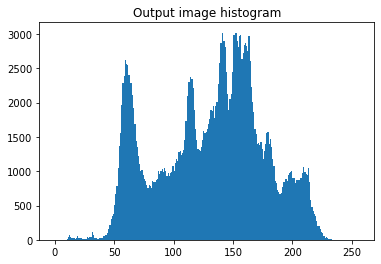

In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

def generateImageWithBorder(inputImage: np.ndarray, borderSize: int):
    size = inputImage.shape
    outputImage = np.zeros((size[0] + borderSize*2, size[1] + borderSize*2), np.uint8)
    outputImage[
        borderSize:borderSize + size[0]-1,  #x1:x2
        borderSize:borderSize + size[1]-1   #y1:y2
        ] = inputImage[
            0:size[0]-1,
            0:size[1]-1]
    return outputImage

def weightedAverage(inputImage: np.ndarray, filterMask: np.ndarray):
    borderSize = filterMask.shape[0] - math.ceil(filterMask.shape[0] / 2)
    borderedImage = generateImageWithBorder(inputImage, borderSize) 
    filterSum = np.sum(filterMask)
    outputImage = inputImage.copy()
    
    print('filterMask:', filterMask.shape) 
    print('borderSize:', borderSize)
    print('filterSum:', filterSum)     
    print('inputImage:', inputImage.shape)
    print('borderedImage:', borderedImage.shape)
    
    for i in range(borderSize, borderedImage.shape[0] - borderSize):
        for j in range(borderSize, borderedImage.shape[1] - borderSize):          
            weightedSum = 0
            for a in range(0, filterMask.shape[0]):
                for b in range(0, filterMask.shape[1]):
                    weightedSum += borderedImage[i + a - borderSize, j + b - borderSize] * filterMask[a, b]
                    
            pixelValue = weightedSum / filterSum
            outputImage[i - borderSize, j - borderSize] = pixelValue
            
    cv2.imshow('Image with border', borderedImage)
    return outputImage


# filter kernel
filterMask = np.array([[1, 2, 1],
                       [2, 8, 2],
                       [1, 2, 1]])
inputimg = cv2.imread('images/lenna.png', cv2.IMREAD_GRAYSCALE)
outputimg = weightedAverage(inputimg, filterMask)

plt.title('Input image histogram')
plt.hist(inputimg.ravel(), 256, [0, 256])
plt.show()

plt.title('Output image histogram')
plt.hist(outputimg.ravel(), 256, [0, 256])
plt.show()    

cv2.imshow('Input image', inputimg)
cv2.imshow('Output image [Weighted average filter]', outputimg)
cv2.waitKey(0)
cv2.destroyAllWindows()